# **#2 Homework: Classification**

**Fundamentals of Data Science - Winter Semester 2024**

##### Matteo Migliarini (TA), Matteo Rampolla (TA) and Prof. Indro Spinelli
<migliarini.1886186@studenti.uniroma1.it>, <rampolla.1762214@studenti.uniroma1.it>, <spinelli@di.uniroma1.it>

---

*Note: your task is to fill in the missing code where you see `"YOUR CODE HERE"` and the text part `"WRITE YOUR TEXT HERE"` part corresponding to each subproblem and produce brief reports on the results whenever necessary. Note also that a part of this missing code is also distributed in the python files in the folder `libs/`*

As part of the homework, provide the answer to questions in this notebook report-like manner. 

After you have implemented all the missing code in the required sections, you will be able to run all the code without any errors. 

We kindly ask you to double-check this since **all** the delivered homework will be executed.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.

-------------------------------------

**Submit it** by sending an email to:

<migliarini.1886186@studenti.uniroma1.it>, <rampolla.1762214@studenti.uniroma1.it> and <spinelli@di.uniroma1.it> **by 29th November, 23:59**.

-------------------------------------

**Outline and Scores for #2 Homework:**


* **Question 1: Logistic Regression** *(6 points)*
  * **1.1: Log-likelihood and Gradient Ascent rule** (1 points)
  * **1.2: Implementation of Logistic Regression with Gradient Ascent** (2 points)
  * **1.3: Report** (3 points)
* **Question 2: Polynomial Expansion** *(7 points)*
  * **2.1: Polynomial features for logistic regression** (1 points)
  * **2.2: Plot the computed non-linear boundary** (2 point)
  * **2.4: Penalization** (4 points)
* **Question 3: Multinomial Classification** *(9  points)*
  * **3.1: Softmax Regression Model** (1 point)
  * **3.2: Coding** (3 points)
  * **3.3: Pipeline** (2 point)
  * **3.4: Hyperparameters** (1 point)
  * **3.5: Report** (2 point)
* **Question 4: First approach to CNNs** *(8 points)*
  * **4.1: Split the CIFAR-10 dataset** (1 point)
  * **4.2: Identify and Correct Errors in the CNN Model** (3 points)
  * **4.3: Training procedure** (2 points)
  * **4.4: Evaluate** (1 point)
  * **4.5: Report** (1 point)
* **Question 5: Improve the accuracy** (BONUS) *(5 points)*
  * **5.1: Custom model** (3 points)
  * **5.2: Pretrained Network** (2 points)

**TOTAL POINTS ARE 35, MAXIMUM GRADE IS 30**

---


In [153]:
if True:
    %pip install -qqq numpy scipy matplotlib pandas scikit-learn seaborn tqdm

Note: you may need to restart the kernel to use updated packages.


In [14]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%load_ext autoreload
%autoreload 2

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Notation:**

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

**Let's start by setting up our Python environment and importing the required libraries:**

## 1: **Logistic Regression**

### **1.1: Log-likelihood and Gradient Ascent Rule** 

Write the likelihood $L(\theta)$ and log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall the probabilistic interpretation of the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ and that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$.

Also derive the gradient $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ and write the gradient update equation. 

-------------------------------------------------------

**WRITE YOUR EQUATIONS HERE**

- **Likelihood**: 
\begin{align}
L(\theta) &= \prod_{i=1}^{m}{h_\theta(x^{i})^{y^{i}} (1 - h_\theta(x^{i}))^{(1 - y^{i})}}
\end{align}

- **Log-Likelihood**: 

\begin{align}
l(\theta) &= \sum_{i=1}^{m}{y^{i} \cdot log(h_\theta(x^{i})) + (1 - y^{i}) \cdot log(1 - h_\theta(x^{i}))}
\end{align}

- **Gradient of log-likelihood** (slide 5 p. 20):
\begin{align}
\frac{\delta l(\theta)}{\delta \theta_j} &= \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{i}) - y^{i}) \cdot x^{i}
\end{align}

- **Gradient update equation**: 
For  $j=0,...,n$:
\begin{equation}
\theta_j = \theta_j - \alpha \frac{\delta l(\theta)}{\delta \theta_j}
\end{equation}

-------------------------------------------------------

### **1.2: Logistic regression with Gradient Ascent**

Define the sigmoid function `sigmoid`, then define the `LogisticRegression` class with the relative methods necessary to make predictions on an input, compute the log-likelihood and update its parameters. 
Then define a function that takes in input such $X$, $y$ and the predictions $\hat{y} = g(\theta^{T}x)$ and computes the gradient of the log-likelihood.
Finally implement a function that takes in input such class and performs the training loop with the specified hyperparameters.

Translate the equations you wrote above in code to learn the logistic regression parameters, $x^{(i)}_1$ and $x^{(i)}_2$ represent the two features for the $i$-th data sample $x^{(i)}$ and $y^{(i)}$ is its ground truth label.

*Hint: even though by definition log likelihood and gradient ascent are defined by summations, for numerical stability it is advised to use the mean operation.*

--------------------------------------------

**Fill in the code in `libs/models/logisic_regression.py`, `libs/math.py/sigmoid()` and `libs/optim.py`**

--------------------------------------------

In [15]:
from libs.models import LogisticRegression
from libs.optim import fit

from libs.math import sigmoid


**Check your grad_l implementation:**

`LogisticRegression.log_likelihood` applied to some random vectors should provide a value for `output_test` close to the `target_value` (defined below).
In other words, `error_test` should be close to 0.

**Do not write below this line just run it**

--------------------------------------------

In [16]:
target_value = -1
np.random.seed(1)
output_test = LogisticRegression.likelihood(np.random.random(100), np.random.randint(0, 2, 100))
error_test = np.abs(output_test - target_value)
print("Error: ", error_test)
assert error_test < 0.2, "The output is not correct"

Error:  0.031996098220603564


#### Preprocessing
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width=800/>

Now you'll load a dataset of penguins data. The dataset contains three species of penguins (Adelie, Gentoo and Chinstrap). Your goal will be to classify a penguin species based on their bill's length and body mass. First we'll load the dataset:

In [17]:
data = pd.read_csv("assets/train.csv")
data

,Id,island,sex,species,bill_length,bill_depth,flipper_length,body_mass
0,182,Biscoe,FEMALE,Gentoo,47.10,16.00,184.43,2862.01
1,39,Biscoe,FEMALE,Gentoo,55.63,7.55,187.28,3345.10
2,265,Torgersen,FEMALE,Adelie,35.03,19.80,202.43,3536.63
3,158,Biscoe,NaN,Gentoo,28.18,20.59,220.22,4235.40
4,254,Dream,MALE,Chinstrap,25.38,25.22,233.34,5732.33
...,...,...,...,...,...,...,...,...
197,223,Torgersen,MALE,Adelie,28.89,28.36,169.67,3729.26
198,247,Dream,MALE,Adelie,19.48,28.50,210.12,4549.29
199,54,Biscoe,FEMALE,Gentoo,52.18,16.26,206.29,4286.98
200,140,Biscoe,MALE,Adelie,54.44,16.32,177.92,4008.17


We want to train a classifier capable of understanding the difference between Adelie and Gentoo solely based on their bill's length and body mass. Thus in order to preprocess the data we:
1. Drop all the items with null data.
2. Remove the third species (Chinstrap) from the dataset.
3. Select the features we're interested in (`bill_length`, `body_mass`).
4. Select the label data and encode it in the values 0 and 1.

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="500"/> 

In [18]:
data.dropna(inplace=True)
data = data[data["species"] != "Chinstrap"]
X = data[["bill_length", "body_mass"]]
y = data["species"].map({"Adelie": 0, "Gentoo": 1}).values
data

,Id,island,sex,species,bill_length,bill_depth,flipper_length,body_mass
0,182,Biscoe,FEMALE,Gentoo,47.10,16.00,184.43,2862.01
1,39,Biscoe,FEMALE,Gentoo,55.63,7.55,187.28,3345.10
2,265,Torgersen,FEMALE,Adelie,35.03,19.80,202.43,3536.63
5,45,Torgersen,MALE,Adelie,47.00,13.00,198.00,5629.80
6,65,Dream,MALE,Adelie,18.48,16.30,188.27,5517.11
...,...,...,...,...,...,...,...,...
196,205,Biscoe,MALE,Gentoo,52.48,13.49,196.82,4746.64
197,223,Torgersen,MALE,Adelie,28.89,28.36,169.67,3729.26
198,247,Dream,MALE,Adelie,19.48,28.50,210.12,4549.29
199,54,Biscoe,FEMALE,Gentoo,52.18,16.26,206.29,4286.98


It is recommended to normalize data when using machine learning techniques, so now normalize $X$ to have $\mu=0, \sigma=1$.

In [19]:
##############################################
###             YOUR CODE HERE           #####
##############################################
mean = X.mean()
std = X.std()

# Normalize features
X = (X - mean) / std

We add a column of 1's to $X$ to take into account the intercept.

In [20]:
X["bias"] = 1
# Reordering columns to have the bias term first (convention)
X = X[["bias", "bill_length", "body_mass"]] 
X

,bias,bill_length,body_mass
0,1,0.444021,-0.748712
1,1,1.022341,-0.507442
2,1,-0.374306,-0.411786
5,1,0.437241,0.633610
6,1,-1.496369,0.577329
...,...,...,...
196,1,0.808777,0.192532
197,1,-0.790588,-0.315580
198,1,-1.428571,0.093969
199,1,0.788437,-0.037037


#### Training
Now you'll use the class defined above to train a logistic regression model on classifying a group of penguins.

In [21]:
# Initialize the model
model = LogisticRegression(num_features=X.shape[1])

# Run Gradient Ascent method
n_iter = 50
log_l_history, _ = fit(model, X, y, lr=0.5, num_steps=n_iter)

Let's plot the log likelihood over different iterations:


Text(0.5, 0, 'Iterations')

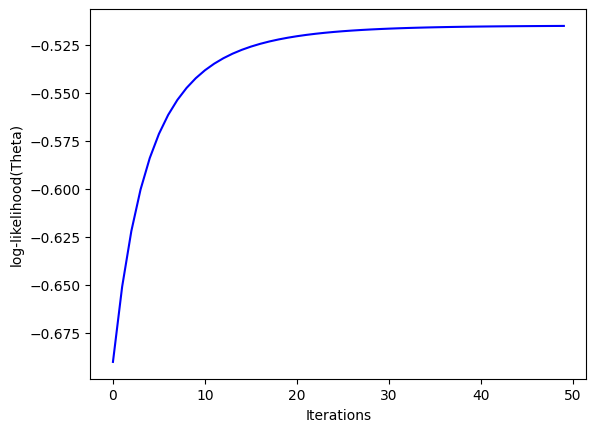

In [22]:
plt.plot(range(len(log_l_history)), log_l_history, "b")
plt.ylabel("log-likelihood(Theta)")
plt.xlabel("Iterations")

Plot the data and the decision boundary:

C:\Users\Edoardo\AppData\Local\Temp\ipykernel_20656\4051455962.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]


(-2.4624306915019663, 2.5724825717974427)

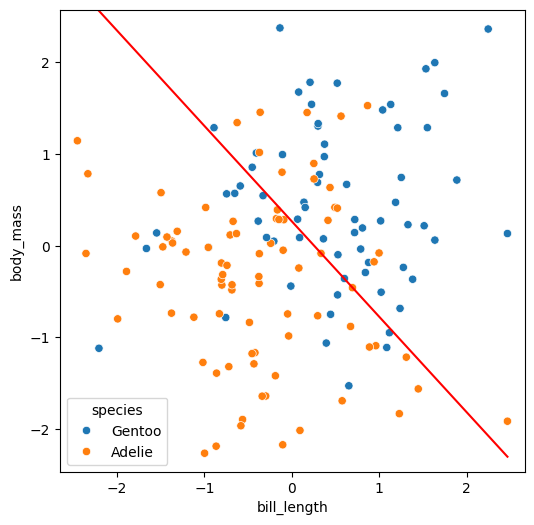

In [23]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=X, x="bill_length", y="body_mass", hue=data["species"])

x_range = np.linspace(X['bill_length'].min(), X['bill_length'].max(), 100)
theta_final = model.parameters
y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
plt.plot(x_range, y_range, c="red")

plt.xlim(X['bill_length'].min() - 0.2, X['bill_length'].max() + 0.2)
plt.ylim(X['body_mass'].min() - 0.2, X['body_mass'].max() + 0.2)

In [24]:
accuracy = ((model.predict(X) > 0.5) == y).mean()
print(f"Accuracy: {accuracy}")
assert accuracy > 0.6, "The accuracy is too low"

Accuracy: 0.7615894039735099


### **1.3: Report**

1. Are we looking for a local minimum or a local maximum using the gradient ascent rule? 
2. You have implemented the gradient ascent rule. Could we have also used gradient descent instead for the proposed problem? Why/Why not?
3. Let's deeply analyze how the learning rate $\alpha$ and the number of iterations affect the final results. Run the algorithm you have written for different values of $\alpha$ and the number of iterations and look at the outputs you get. Is the decision boundary influenced by these parameters change? Why do you think these parameters are affecting/not affecting the results?
4. What happens if you do not normalize the data? Try to run the algorithm without normalizing the data and see what happens. Why do you think this happens?


-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1. Using the gradient ascent rule, we are trying to maximize the Negative Log-Likelihood, so were are looking a local maximum. It can be seen also in graphic of the Negative Log-Likelihood, since the values are getting bigger in each iteration.
2. Theoretically we can also use gradient descent rule, but it can causes some numerical errors in practice. So, generally is used the gradient ascent rule.
3. In our experiments, we considered $\alpha$ as $0.1$ or $1.0$ and the number of iterations as $10$ or $100$. First, considering the variation in $\alpha$ with the number of iterations as $100$, we can see that the change was not very significant. In this case, although the lower $\alpha$ value takes more iterations to converge, given the high number of iterations, convergence also occurred. Now, considering the variation in the number of iterations with $\alpha$ as $0.1$, we see that the higher value resulted in a better defined decision boundary (higher accuracy), even if not much better. Here, for a $\alpha$, a high number of iterations resulted in better convergence in training.

![image](./assets/1_3_3.png)

4. As the data is not normalized, the the values in prediction (before being activated by the Sigmoid function) are more irregular. Consequently, the activation values can have more "extreme" values (big positive or negative numbers) and the training is not as regular as before, as it can be seen the seen in the image below.

![image](./assets/1_3_4.png)

5. *(feel free to add here screenshots or new code cells if needed)*

-------------------------------------------------------

## 2: **Polynomial Expansion**

### **2.1: Polynomial features for logistic regression** 

Define new features e.g., of 2nd and 3rd degree, and learn a logistic regression classifier by using the new features and the gradient ascent optimization algorithm defined in Question 1.

In particular, consider a polynomial boundary with equation:

\begin{equation}
f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2
\end{equation}

Therefore compute 7 new features: 3 new ones for the quadratic terms and 4 new ones for the cubic terms.

Create new arrays by stacking $x$ and the new 7 features (in the order $x_1x_1, x_2x_2, x_1x_2, x_1x_1x_1, x_2x_2x_2, x_1x_1x_2, x_1x_2x_2$). 
In particular create `x_new_quad` by additionally stacking $x$ with the quadratic features, and `x_new_cubic` by additionally stacking $x$ with the quadratic and the cubic features.

**Do not write below this line just run it**

--------------------------------------------

<Axes: >

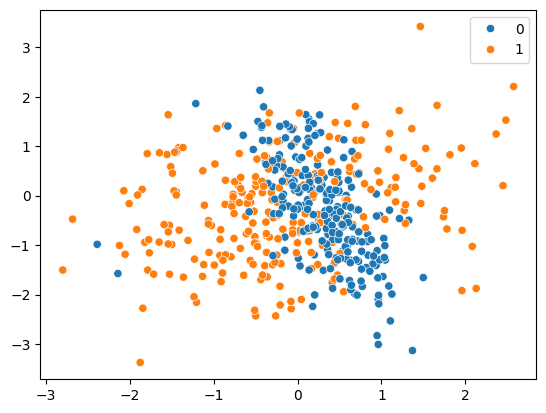

In [25]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=700,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=.3,
    random_state=89,
)
X = np.hstack([np.ones_like(X[:, [0]]), X])
X, X_val, y, y_val = train_test_split(X, y, test_size=200, random_state=42)

sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y)

In [26]:
def get_polynomial(X, degree):
    """
    Given an initial set of features, this function computes the polynomial features up to the given degree.

    Args:
        X: the initial features matrix of shape (n_samples, 3) where the first column is the bias term
        degree: the degree of the polynomial

    Returns:
        X: the final polynomial features
    """
    if degree < 2:
        return X

    ####################################################
    #                 YOUR CODE HERE                  ##
    ####################################################

    n_samples, n_features = X.shape
    assert n_features == 3, "Input X must have exactly 3 features (including bias term)."
    
    # Remove the bias term for polynomial expansion
    X_no_bias = X[:, 1:]
    n_features_no_bias = X_no_bias.shape[1]

    # Initialize list to hold polynomial features
    poly_features = [np.ones(n_samples)]  # Start with the bias term

    # Generate polynomial features up to the given degree
    def generate_terms(current_term, feature_idx, current_degree):
        """
        Recursively generate terms for polynomial expansion.

        Args:
            current_term (np.ndarray): Current product of terms being generated.
            feature_idx (int): Current feature index to include in terms.
            current_degree (int): Remaining degree to allocate among features.
        """
        if current_degree == 0:
            poly_features.append(current_term)
            return
        
        for i in range(feature_idx, n_features_no_bias):
            new_term = current_term * X_no_bias[:, i]
            generate_terms(new_term, i, current_degree - 1)

    for d in range(1, degree + 1):
        generate_terms(np.ones(n_samples), 0, d)

    # Stack all features column-wise
    return np.column_stack(poly_features)


**Do not write below this line just run it**

--------------------------------------------

In [27]:
x_new_quad = get_polynomial(X, degree=2)
x_new_cubic = get_polynomial(X, degree=3)
print(x_new_quad.shape, x_new_cubic.shape)

(500, 6) (500, 10)


Now use the gradient ascent optimization algorithm to learn the models by maximizing the log-likelihood, both for the case of `x_new_quad` and `x_new_cubic`.


**Do not write below this line just run it**

--------------------------------------------

(500,)
(500, 6)


[Text(0.5, 0, 'Iterations'),
 Text(0, 0.5, 'Log Likelihood'),
 Text(0.5, 1.0, 'Log Likelihood History for Different Models')]

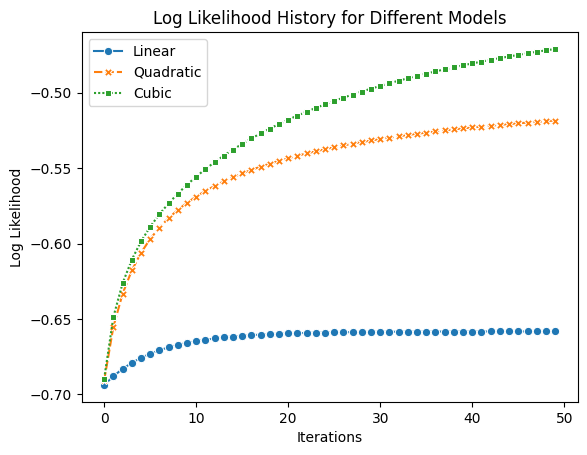

In [28]:
n_iter = 50
model_lin = LogisticRegression(num_features=X.shape[1])
log_l_history,_ = fit(model_lin, X, y, lr=0.5, num_steps=n_iter)

# Initialize model, in case of quadratic features
model_quad = LogisticRegression(num_features=x_new_quad.shape[1])
print(y.shape)
print(x_new_quad.shape)
log_l_history_quad,_ = fit(model_quad, x_new_quad, y, lr=0.5, num_steps=n_iter)


# Initialize model, in case of quadratic and cubic features
model_cubic = LogisticRegression(num_features=x_new_cubic.shape[1])
log_l_history_cubic,_ = fit(model_cubic, x_new_cubic, y, lr=0.5, num_steps=n_iter)

log_l = np.stack([log_l_history, log_l_history_quad, log_l_history_cubic])

log_l_df = pd.DataFrame(log_l.T, columns=["Linear", "Quadratic", "Cubic"])
sns.lineplot(data=log_l_df, markers=True).set(
    xlabel="Iterations", ylabel="Log Likelihood", title="Log Likelihood History for Different Models"
)

### **2.2: Plot the computed non-linear boundary** 

First, define a boundary_function to compute the boundary equation for the input feature vectors $x_1$ and $x_2$, according to estimated parameters theta, both in the case of quadratic (theta_final_quad) and of quadratic and cubic features (theta_final_cubic). Refer for the equation to the introductory part of Question 2.

In [29]:
def boundary_function(x1_vec, x2_vec, theta_final, degree):
    """
    This function computes the boundary function for the given theta_final and degree.

    Args:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        theta_final: the final theta
        degree: the degree of the polynomial

    Returns:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        f: the boundary function
    """

    x1_vec, x2_vec = np.meshgrid(x1_vec, x2_vec)

    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################


    features = [np.ones_like(x1_vec)]
    for i in range(1, degree + 1):
        for j in range(i + 1):
            features.append((x1_vec ** (i - j)) * (x2_vec ** j))
    features = np.vstack(features).reshape(len(features), -1).T

    
    f = features @ theta_final

    return x1_vec, x2_vec, f

Now plot the decision boundaries corresponding to the theta_final_quad and theta_final_cubic solutions.

**Do not write below this line just run it**

--------------------------------------------

Text(0.5, 1.0, 'Decision Boundary for Cubic Features')

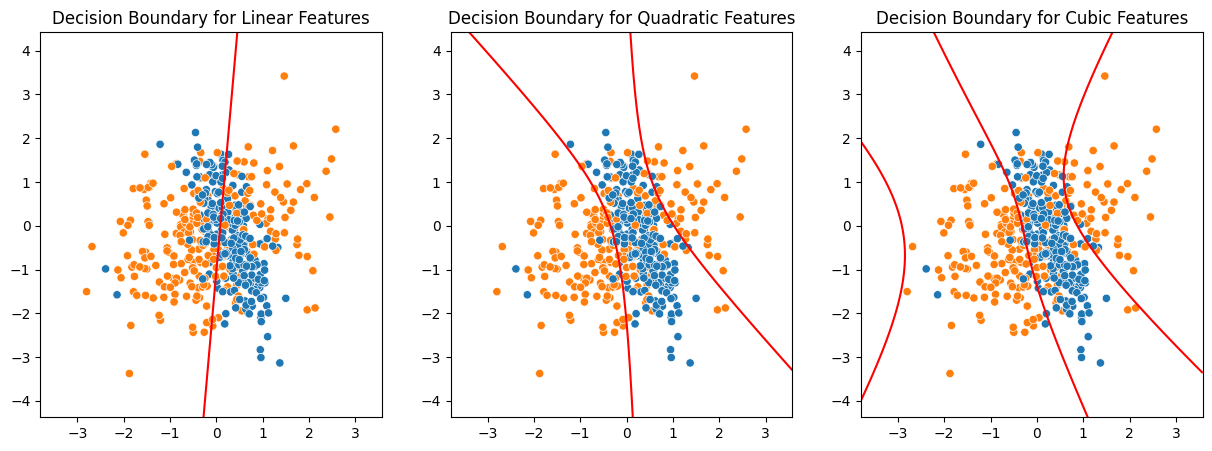

In [30]:
def plot_boundary_function(
    X: np.ndarray, y: np.ndarray, theta: np.ndarray, degree: int, n_points: int = 200
) -> None:
    """
    This function plots the boundary function for the given theta and degree.

    Args:
        X: the input data
        y: the input labels
        theta: the final theta
        degree: the degree of the polynomial
        n_points: the number of points to plot

    Returns:
        None
    """

    x1_vec = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, n_points)
    x2_vec = np.linspace(X[:, 2].min() - 1, X[:, 2].max() + 1, n_points)

    x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta, degree=degree)
    mesh_shape = int(np.sqrt(f.shape[0]))

    sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y, legend=False)
    plt.contour(
        x1_vec, x2_vec, f.reshape((mesh_shape, mesh_shape)), colors="red", levels=[0]
    )

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_boundary_function(X, y, model_lin.parameters, degree=1)
plt.title("Decision Boundary for Linear Features")
plt.subplot(1,3,2)
plot_boundary_function(X, y, model_quad.parameters, degree=2)
plt.title("Decision Boundary for Quadratic Features")
plt.subplot(1,3,3)
plot_boundary_function(X, y, model_cubic.parameters, degree=3)
plt.title("Decision Boundary for Cubic Features")

**Polynomial degree and overfitting**

As the polynomial degree increases, the decision boundary becomes more and more complex. This can lead to overfitting, i.e. the model learns the training data too well, and it is not able to generalize to new data. This is a common problem in machine learning, and it is important to be able to detect it.

In order to detect overfitting, we can split the dataset into a training set and a test set. The training set is used to learn the model, while the test set is used to evaluate the model performance on new data. If the model performs well on the training set, but it performs poorly on the test set, then we have overfitting.

In this exercise, you are asked to plot the training and test accuracy as a function of the polynomial degree. Consider all the polynomial degrees from 1 to 20. For each polynomial degree, learn the model on the training set, and evaluate the accuracy on both the training and the test set. Additionally, visualize the decision boundary for the polynomials that give the **best** and the **worst** test accuracy for $\texttt{degree} \geq 2$.

In [31]:
from sklearn.preprocessing import normalize

def fit_polynomials(X, y, X_test, y_test, degrees, lr, num_steps, architecture = LogisticRegression):
    """
    This function fits a logistic regression model for each degree in the degrees list.
    """
    X = normalize(X)
    X_test = normalize(X_test)

    thetas = []
    accuracy_scores_train, accuracy_scores_test = [], []
    for degree in tqdm(degrees):
        x_new = get_polynomial(X, degree=degree)

        model = architecture(num_features=x_new.shape[1])
        fit(model, x_new, y, lr=lr, num_steps=num_steps)    

        thetas.append(model.parameters)
        y_hat_train = model.predict(x_new) > 0.5
        accuracy_scores_train.append(accuracy_score(y, y_hat_train))
        y_hat_test = model.predict(get_polynomial(X_test, degree=degree)) > 0.5
        accuracy_scores_test.append(accuracy_score(y_test, y_hat_test))
        
    return thetas, accuracy_scores_train, accuracy_scores_test

100%|██████████| 19/19 [00:00<00:00, 20.87it/s]


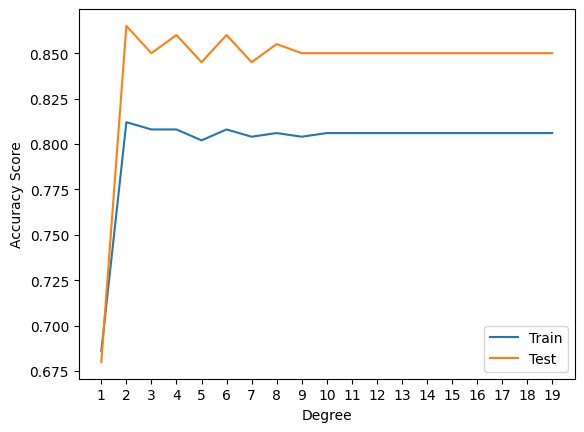

In [32]:
degrees = np.arange(1, 20)
np.random.seed(42)
thetas, accuracy_scores_train, accuracy_scores_test = fit_polynomials(
    X, y, X_val, y_val, degrees=degrees, lr=0.5, num_steps=500, architecture=LogisticRegression
)
sns.lineplot(x=degrees, y=accuracy_scores_train, label="Train")
sns.lineplot(x=degrees, y=accuracy_scores_test,  label="Test")
plt.xlabel("Degree")
plt.ylabel("Accuracy Score")
plt.xticks(degrees)
plt.show()

Plot the best and the worst decision boundaries for $\texttt{degree} \geq 2$.

--------------------------------------------
**Write your code below this line**

--------------------------------------------

In [33]:
def plot_decision_boundary(model, X, y, degree, title):
    """
    Plot the decision boundary for a given model.
    """
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    # Prepare the grid for predictions
    grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    poly_grid = get_polynomial(grid, degree=degree)
    Z = model.predict(poly_grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

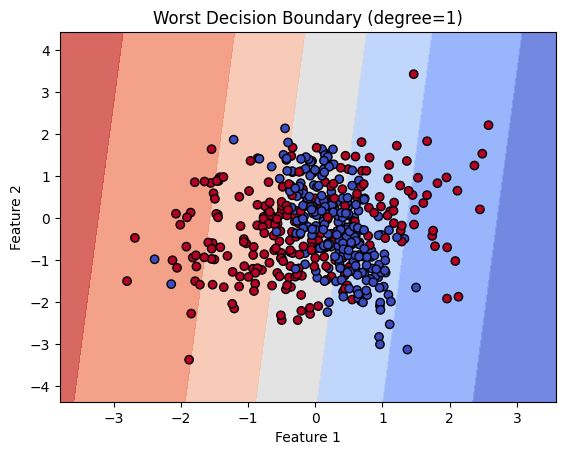

In [34]:
# Plot worst model
worst_degree_index = np.argmin(accuracy_scores_test)
worst_degree = degrees[worst_degree_index]
worst_model = LogisticRegression(num_features=get_polynomial(X, worst_degree).shape[1])
fit(worst_model, get_polynomial(X, worst_degree), y, lr=0.5, num_steps=500)
plot_decision_boundary(worst_model, X, y, worst_degree, f"Worst Decision Boundary (degree={worst_degree})")

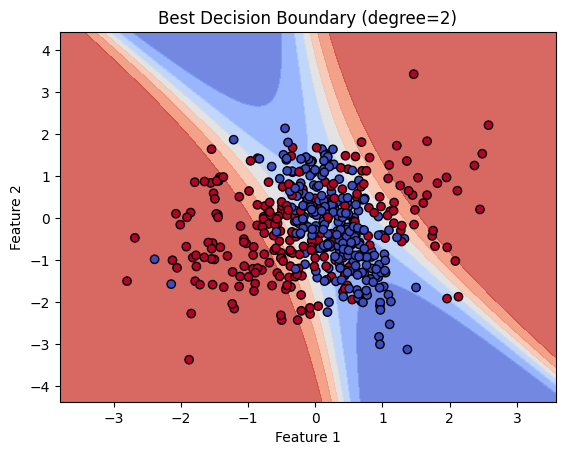

In [35]:
# Plot best model
# Plot the decision boundaries
best_degree_index = np.argmax(accuracy_scores_test)
best_degree = degrees[best_degree_index]
# Fit models for the best and worst degrees
best_model = LogisticRegression(num_features=get_polynomial(X, best_degree).shape[1])
fit(best_model, get_polynomial(X, best_degree), y, lr=0.5, num_steps=500)
plot_decision_boundary(best_model, X, y, best_degree, f"Best Decision Boundary (degree={best_degree})")

#### **Report** 
Write now your considerations. Discuss in particular:
1. Look back at the plots you have generated. What can you say about the differences between the linear, quadratic, and cubic decision boundaries? Can you say if the model is improving in performances, increasing the degree of the polynomial? Do you think you can incur in underfitting increasing more and more the degree?
2. Look at the plot of the training and test accuracy as a function of the polynomial degree. What can you say about the differences between the training and test accuracy? What can you say about the differences between the best and the worst test accuracy? In general, is it desirable to have a very complex decision boundary, i.e. a very high degree of the polynomial? Discuss and motivate your answer. 
3. In general what are some properties of the dataset that makes it more prone to overfitting? Discuss their impact.


-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1. You can see that the decision boundary is best for the quadratic function. But this is not always the case, it depends on the data. In this case, a linear decision boundary is not very efficient, since it is not possible to separate the colors using just one line. The more degrees, the more complex the decision boundary can be. So, in a very simple dataset, a high degree can increase the chance of overfitting. On the other extreme, if you have a complex dataset and use a low degree, it can cause underfitting.
2. It can be seen that the best accuracy in training and testing occurs when the degree is 2. Furthermore, all other higher degrees also have high accuracies, but with a more complex decision boundary. It is desirable that the decision boundary be as simple as possible, without disturbing the accuracy. To achieve this, it is important to model the data considering not only the best accuracy in training or testing.
3. An imbalanced dataset may tend to overffiting because the model can only fit the most predominant class. In this case, if the model fits very well in the majority class, its accuracy will be high, but the model may not necessarily have been able to capture the patterns of all classes well.



-------------------------------------------------------

### **2.4: Weight Penalization**

Look at how complicated the decision boundaries become as you increase the degree. Can we improve this and prevent overfitting?
When dealing with overfitting one frequent solution is to use a weigth penalization technique like L2 or L1 penalization. 

In our case we'll use L2 regularization. In this way the regularized likelihood will be:
$$
\texttt{Likelihood}_{reg}(\theta) = \texttt{Likelihood}(\theta) - \frac{\lambda}{2n} \sum^n_i \theta_i^2
$$
Thus we can derive the update rule as:
\begin{equation}
\theta_j:= \theta_j + \alpha( \frac{\partial l(\theta_j)}{\partial \theta_j} -  \frac{\partial}{\partial \theta_j} \left( \frac{\lambda}{2} \theta_j^2 \right ) )
\end{equation}

Calculating the second term of the update rule it's just a matter of analytically solving a simple gradient, do it, and then implement it by extending the `LogisticRegression` class:

--------------------------------------------

**Fill in the code in `libs/models/logisic_regression_penalized.py`**

--------------------------------------------

In [36]:
from libs.models import LogisticRegressionPenalized

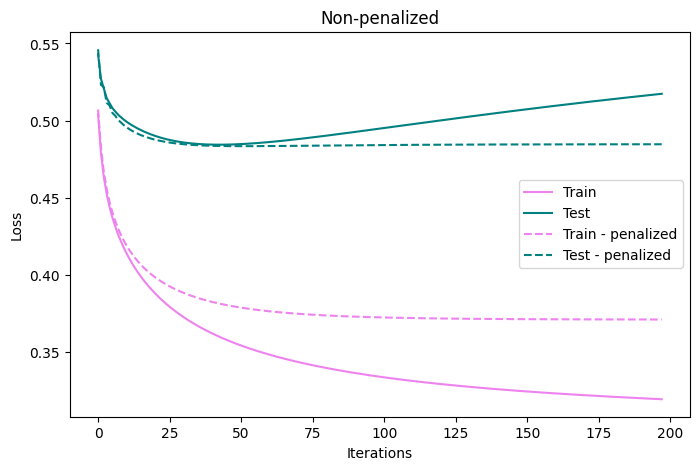

In [37]:
X,y = make_classification(
    n_samples=500, 
    n_features=100, 
    n_informative=50, 
    n_redundant=25, 
    n_classes=2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
np.random.seed(42)

lr = LogisticRegression(X.shape[1])
likelihood_history, val_loss_history = fit(lr, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)

penalized_lt = LogisticRegressionPenalized(X.shape[1], 2)
pen_history, pen_val_history = fit(penalized_lt, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)

plt.figure(figsize=(8, 5))
plt.plot(-likelihood_history[2:], label="Train", color="violet")
plt.plot(val_loss_history[2:], label="Test", color='teal')
plt.plot(-pen_history[2:], label="Train - penalized", color="violet", linestyle="--")
plt.plot(pen_val_history[2:], label="Test - penalized", color="teal", linestyle="--")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Non-penalized")
plt.legend()

Now, evaluate the Penalized Logistic Regression for each value of $\lambda \in [0,3]$ and find the one that performs the best: 

Lambda: 0.00, Final Validation Loss: 0.5179
Lambda: 0.10, Final Validation Loss: 0.5082
Lambda: 0.20, Final Validation Loss: 0.5062
Lambda: 0.30, Final Validation Loss: 0.4992
Lambda: 0.40, Final Validation Loss: 0.4956
Lambda: 0.50, Final Validation Loss: 0.4919
Lambda: 0.60, Final Validation Loss: 0.4892
Lambda: 0.70, Final Validation Loss: 0.4887
Lambda: 0.80, Final Validation Loss: 0.4874
Lambda: 0.90, Final Validation Loss: 0.4862
Lambda: 1.00, Final Validation Loss: 0.4860
Lambda: 1.10, Final Validation Loss: 0.4851
Lambda: 1.20, Final Validation Loss: 0.4849
Lambda: 1.30, Final Validation Loss: 0.4843
Lambda: 1.40, Final Validation Loss: 0.4841
Lambda: 1.50, Final Validation Loss: 0.4841
Lambda: 1.60, Final Validation Loss: 0.4842
Lambda: 1.70, Final Validation Loss: 0.4842
Lambda: 1.80, Final Validation Loss: 0.4844
Lambda: 1.90, Final Validation Loss: 0.4845
Lambda: 2.00, Final Validation Loss: 0.4847
Lambda: 2.10, Final Validation Loss: 0.4849
Lambda: 2.20, Final Validation L

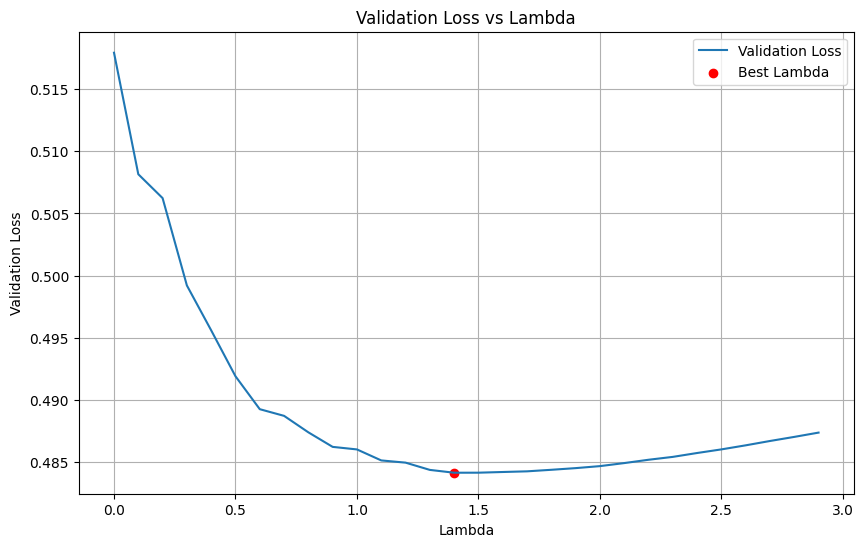

In [38]:
lambdas = np.arange(0, 3, 0.1)
losses = []

for lambda_ in lambdas:
    ##############################################
    ###         COMPLETE THIS FOR-LOOP         ###
    ##############################################

    # Initialize model with current lambda
    model = LogisticRegressionPenalized(num_features=X_train.shape[1], lambda_=lambda_)
    
    # Train the model
    history, val_loss_history = fit(model, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)
    
    # Record the final validation loss
    final_val_loss = val_loss_history[-1]
    losses.append(final_val_loss)
    
    # Debugging information
    print(f"Lambda: {lambda_:.2f}, Final Validation Loss: {final_val_loss:.4f}")

# Plot the validation loss against lambda
if len(losses) > 0:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=lambdas, y=losses, label="Validation Loss")
    plt.xlabel("Lambda")
    plt.ylabel("Validation Loss")
    plt.title("Validation Loss vs Lambda")
    plt.grid(True)
    plt.legend()

    # Find and print the best lambda
    best_lambda_index = np.argmin(losses)
    best_lambda = lambdas[best_lambda_index]
    print(f"Best lambda: {best_lambda:.2f} (Validation Loss: {losses[best_lambda_index]:.4f})")
    plt.scatter([best_lambda], [losses[best_lambda_index]], color="red", label="Best Lambda")
    plt.legend()
    plt.show()

#### Report
Write now your considerations. In particular:
1. What happens when we use a non-penalized logistic regression?
2. Observe the plot of the Train and Validation losses in the penalized vs non penalized case. In which case is the Train loss better? Can you explain why?
3. What is the convergence rate? How is it influenced by the penalization?

-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1. The model can achieve a good accuracy but learning a more complex pattern from the data, which is not desireble because it can prone overfitting. Using regularization, the model tends to generalize better.
2. The penalized losses are better. The non-penalized losses, although they are numeracally lower, they show a high probability of overffiting, because the training loss started to increase at the end of the training, it doesn't happen with the penalized one. 
3. Convergence rate in optimization refers to how quickly an algorithm approaches the optimal solution. Since the penalty changes the loss calculation, it can influence a slow convergence rate, in favor to avoid overfitting.

-------------------------------------------------------

## 3: **Multinomial Classification**

### **3.1: Softmax Regression Model**

In the multinomial classification we generally have $K>2$ classes. So the label for the $i$-th sample $X_i$ is $y_i\in\{1,...,K\}$, where $i=1,...,N$. The output class for each sample is estimated by returning a score $s_i$ for each of the K classes. This results in a vector of scores of dimension K. 
In this exercise we'll use the *Softmax Regression* model, which is the natural extension of *Logistic Regression* for the case of more than 2 classes. The score array is given by the linear model:

\begin{align*}
s_i =  X_i \theta
\end{align*}

Scores may be interpreted probabilistically, upon application of the function *softmax*. The position in the vector with the highest probability will be predicted as the output class. The probability of the class k for the $i$-th data sample is:

\begin{align*}
p_{ik} = \frac{\exp(X_i \theta_k)}{\sum_{j=1}^K(X_i \theta_j))}
\end{align*}

We will adopt the *Cross Entropy* loss and optimize the model via *Gradient Descent*. 
In the first of this exercise we have to: 
-    Write the equations of the Cross Entropy loss for the Softmax regression model;
-    Compute the equation for the gradient of the Cross Entropy loss for the model, in order to use it in the gradient descent algorithm.

#### A bit of notation

*  N: is the number of samples 
*  K: is the number of classes
*  X: is the input dataset and it has shape (N, H) where H is the number of features
*  y: is the output array with the labels; it has shape (N, 1)
*  $\theta$: is the parameter matrix of the model; it has shape (H, K)

--------------------------------------------
**Write you equation below this line**

--------------------------------------------

$$J(\theta) = -\frac{1}{N}\sum_{i=1}^{N} \sum_{k=1}^{K} \mathbf{1}[y^{(i)} = k] \log \frac{\exp(\theta^{(k)\top}x^{(i)})}{\sum_{j=1}^{K} \exp(\theta^{(j)\top}x^{(i)})}$$

$$L(\theta; x^{(i)}) = -\sum_{k=1}^{K} \mathbf{1}[y^{(i)} = k] \log \frac{\exp(\theta^{(k)\top}x^{(i)})}{\sum_{j=1}^{K} \exp(\theta^{(j)\top}x^{(i)})}$$

$$\nabla_{\theta^{(k)}} J(\theta) = -\frac{1}{N} \sum_{i=1}^{N} x^{(i)} \left( \mathbf{1}[y^{(i)} = k] - P(y^{(i)} = k | x^{(i)}; \theta) \right)$$


### **3.2: Coding**

We are using the CIFAR-10 dataset for this exercise. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. It has 50,000 training images and 10,000 test images. The dataset was established by the Canadian Institute For Advanced Research (CIFAR), and it has become a standard benchmark for machine learning algorithms, especially in the area of image classification.

In [39]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

cifar_dir = "assets/cifar10"
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.CIFAR10(
    root=cifar_dir, train=True, download=True, transform=transform
)
test_data = datasets.CIFAR10(
    root=cifar_dir, train=False, download=True, transform=transform
)

# Convert labels to one-hot encoded format
def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((len(y), num_classes))
    for i, val in enumerate(y):
        encoded[i, val] = 1
    return encoded

# Evaluate the accuracy of the predictions
def compute_accuracy(predictions, true_labels):
    correct_predictions = np.sum(predictions == true_labels)
    total_predictions = len(true_labels)
    return correct_predictions / total_predictions

# Preprocess the data
X_train = [img.reshape(-1).numpy() for img, _ in train_data]
X_train = np.array(X_train)
y_train = [label for _, label in train_data]

X_val = [img.reshape(-1).numpy() for img, _ in test_data]
X_val = np.array(X_val)
y_val = [label for _, label in test_data]


# Add bias term to X
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])

y_train_onehot = one_hot_encode(y_train)
y_test_onehot = one_hot_encode(y_val)

Files already downloaded and verified
Files already downloaded and verified


*Hint: consider the labels as one-hot vector. This will allow matrix operations (element-wise multiplication and summation).*

Now implement a classifier for Multinomial Classification using the `softmax` function. Again, implement it as a class with the methods:
- `predict`
- `predict_labels`
- `likelihood` *(Here you need to implement the Cross Entropy Loss)*
- `update_theta`
- `compute_gradient` to compute the Jacobian $\nabla$

Note that this this you don't need to reimplement the `fit()` function since the training loop you defined above works also for a Multinomial Classifier, provided that this is structured with the previously mentioned methods.

--------------------------------------------

**Fill in the code in `libs/models/multinomial.py` and `libs/math.py/softmax()`**

--------------------------------------------

In [40]:
from libs.models import SoftmaxClassifier
from libs.optim import fit

--------------------------------------------

**Do not write below this line just run it**

--------------------------------------------

*Execution can take around 10 minutes*

In [41]:
# Apply gradient descent to optimize theta
#### CHANGED FROM 0.01 TO 0.001
alpha = 0.01
#### CHANGED FROM 500 TO 250
iterations = 500
H, K = X_train.shape[1], 10  # number of features and number of classes
model = SoftmaxClassifier(num_features=H, num_classes=K)
loss_history, _ = fit(model, X_train, y_train_onehot, lr=alpha, num_steps=iterations)

# Make predictions on the training and test data
train_predictions = model.predict_labels(X_train)
test_predictions = model.predict_labels(X_val)

train_accuracy = compute_accuracy(train_predictions, y_train)
test_accuracy = compute_accuracy(test_predictions, y_val)

print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Training accuracy: 36.99%
Test accuracy: 36.55%


### **3.3: Pipeline**
Now you're going to use `scikit-learn` library to build a pipeline of operations to redo everything we've done so far in the homework. First we have loaded the required modules and the penguins dataset.

---

Then here you'll build the pipeline. We need four items:
1. The Numerical Transformer, to handle the preprocessing of numerical columns, by:
    - Imputing missing values with their mean
    - Enrich the features with a 3-rd degree polynomial expansion
    - Scaling of the features to $\mu=0, \sigma=1$
2. The Categorical Transformer, to handle the preprocessing of categorical values, by:
    - Imputing the missing values with the most frequent value
    - Encode the features in a one-hot vector.
3. The Preprocessor: a ColumnTransformer that distributed the numerical columns to the numerical transformer and the categorical columns to the categorical tranformer.
4. The final Pipeline, which contains the preprocessor and the classfier of your choice (in this case `KNeighborsClassifier`)

In [42]:
data = pd.read_csv('assets/train.csv')

X_train, X_val, y_train, y_val = train_test_split(data.drop('species', axis=1), data.species, test_size=0.2, random_state=42)

In [43]:
numerical_cols = ['bill_length', 'bill_depth', 'flipper_length', 'body_mass']
categorical_cols = ['island', 'sex']

##############################################
###          FILL IN THIS CODE           #####
##############################################
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
## Import everything you need here

numeric_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    PolynomialFeatures(degree=3, include_bias=False),
    StandardScaler()
)


categoric_transfomer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop='first')
)

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categoric_transfomer, categorical_cols)
], remainder='drop')

pipe = make_pipeline() 
if len(pipe.named_steps)>0:
    display(pipe)

pipe = make_pipeline(preprocessor, KNeighborsClassifier())
if len(pipe.named_steps)>0:
    display(pipe)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['bill_length', 'bill_depth',
                                                   'flipper_length',
                                                   'body_mass']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['island', 'sex'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

Now, we can use this pipeline to preprocess the input data and fit a classifier. Leveraging `scikit-learn`'s pipelines allows you to:
- Define the entire chain of operations in a structured way, which is especially useful for cleaning and transforming data.
- Separate the definition of operations from their execution, creating a clean and organized workflow.

This approach makes it easier to manage complex preprocessing steps while maintaining readability and clarity in your code.

In [44]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

      Adelie       0.75      0.75      0.75        20
   Chinstrap       0.71      0.56      0.62         9
      Gentoo       0.57      0.67      0.62        12

    accuracy                           0.68        41
   macro avg       0.68      0.66      0.66        41
weighted avg       0.69      0.68      0.68        41



This is nice but can we improve it? In defining the pipeline you certainly used some fixed hyperparameters, for example the number of neighbors or the degree of the polynomial expansion.

First, let's look at the list of hyperparameters: 

In [45]:
hparams = pipe.get_params()
for hp, val in hparams.items():
    if type(val) not in [int, float, str]:
        continue
    print(f"{hp}: {val}")

columntransformer__remainder: drop
columntransformer__sparse_threshold: 0.3
columntransformer__num__simpleimputer__missing_values: nan
columntransformer__num__simpleimputer__strategy: mean
columntransformer__num__polynomialfeatures__degree: 3
columntransformer__num__polynomialfeatures__order: C
columntransformer__cat__simpleimputer__missing_values: nan
columntransformer__cat__simpleimputer__strategy: most_frequent
columntransformer__cat__onehotencoder__categories: auto
columntransformer__cat__onehotencoder__drop: first
columntransformer__cat__onehotencoder__feature_name_combiner: concat
columntransformer__cat__onehotencoder__handle_unknown: error
kneighborsclassifier__algorithm: auto
kneighborsclassifier__leaf_size: 30
kneighborsclassifier__metric: minkowski
kneighborsclassifier__n_neighbors: 5
kneighborsclassifier__p: 2
kneighborsclassifier__weights: uniform


Some of these hyperparameters are set to their default values, while others are explicitly defined. However, any data scientist knows that hyperparameters should not be arbitrarily chosen; instead, they should be optimized through **Cross-Validation**.

We can leverage the compositionality of `scikit-learn` by incorporating the pipeline into a `GridSearchCV` class. This allows you to easily define a grid of parameters to val and automatically perform cross-validation over the combinations.

Choose at least 2 values for at least 3 hyperparameters. val their impact on the model and find the best combination.

In [46]:
from sklearn.model_selection import GridSearchCV

grid = dict(
  columntransformer__num__polynomialfeatures__degree = [1, 2, 3 ],
    kneighborsclassifier__n_neighbors = [5, 8, 12],
    kneighborsclassifier__leaf_size = [20, 35, 50]
)



pipe_cv = GridSearchCV(
    pipe,
    param_grid=grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

if pipe_cv is not None:
    pipe_cv.fit(X_train, y_train)
    print(f"Best score: {pipe_cv.best_score_}")
    for hp, val in pipe_cv.best_params_.items():
        print(f"{hp}: {val}")

for param_name, value in grid.items():
    print(f"{param_name}: {value}")
    print()

#sta roba è magia comunque.

Best score: 0.7511029411764706
columntransformer__num__polynomialfeatures__degree: 1
kneighborsclassifier__leaf_size: 20
kneighborsclassifier__n_neighbors: 8
columntransformer__num__polynomialfeatures__degree: [1, 2, 3]

kneighborsclassifier__n_neighbors: [5, 8, 12]

kneighborsclassifier__leaf_size: [20, 35, 50]



`GridSearchCV` doesn't only find the best combination of hyperparmeters, but it also refits the model with the best hyperparameters it finds. Let's val this new model:

In [47]:
y_pred = pipe_cv.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

      Adelie       0.75      0.75      0.75        20
   Chinstrap       0.78      0.78      0.78         9
      Gentoo       0.75      0.75      0.75        12

    accuracy                           0.76        41
   macro avg       0.76      0.76      0.76        41
weighted avg       0.76      0.76      0.76        41



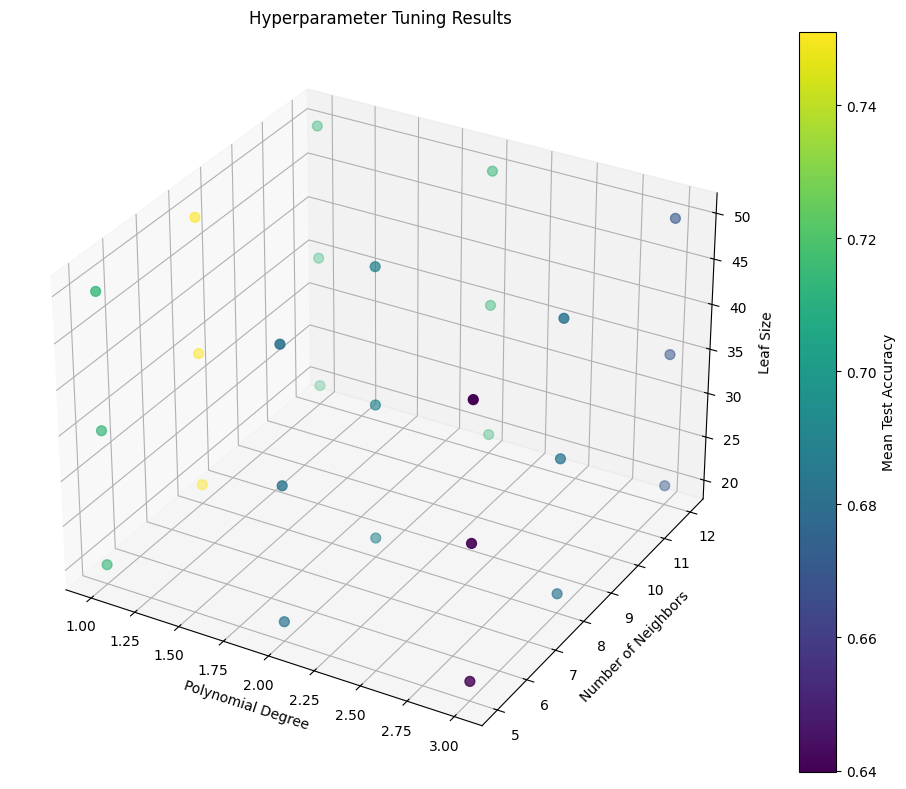

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming pipe_cv has been fitted
results = pipe_cv.cv_results_
# Extract the hyperparameters and mean test scores
degrees = results['param_columntransformer__num__polynomialfeatures__degree'].data
n_neighbors = results['param_kneighborsclassifier__n_neighbors'].data
leaf_sizes = results['param_kneighborsclassifier__leaf_size'].data
mean_test_scores = results['mean_test_score']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

# Create scatter plot with color mapped to mean test scores
scatter = ax.scatter(
    xs=degrees,
    ys=n_neighbors,
    zs=leaf_sizes,
    c=mean_test_scores,
    cmap='viridis',
    s=50  # marker size
)

# Set labels
ax.set_xlabel('Polynomial Degree')
ax.set_ylabel('Number of Neighbors')
ax.set_zlabel('Leaf Size')

# Add a color bar
plt.colorbar(scatter, label='Mean Test Accuracy')

# Set title
plt.title('Hyperparameter Tuning Results')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Report
1. How many combinations has your gridsearch tried?
2. Make a plot with the results of your hyperparameter grid
3. Do you notice any trend in the performance of certain hyperparameters?
4. Do the classifiers obtain the same accuracy on train and val sets? If not, try to give an explanation.
5. With the choice of hyperparameters you made, do you notice any trade-off between accuracy and compute power? Show with a plot.

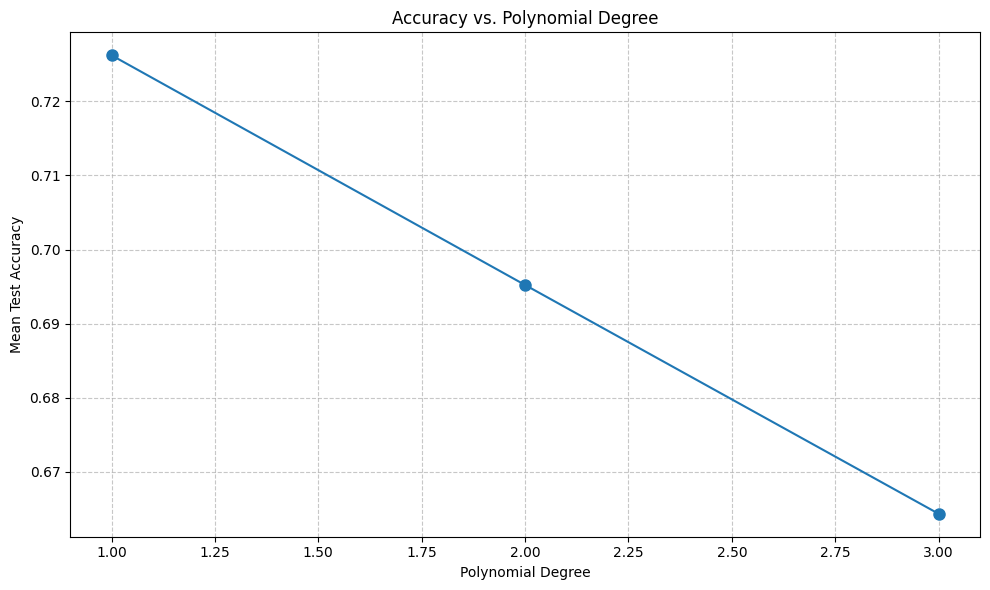

In [49]:
cv_res = pd.DataFrame(pipe_cv.cv_results_)
cv_res.columns = [col.split('__')[-1] for col in cv_res.columns]

##############################################
###                YOUR CODE HERE         ####
##############################################

# Assuming pipe_cv has been fitted
results = pipe_cv.cv_results_
# Extract the hyperparameters and mean test scores
degrees = results['param_columntransformer__num__polynomialfeatures__degree'].data
mean_test_scores = results['mean_test_score']

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Polynomial Degree': degrees,
    'Mean Test Accuracy': mean_test_scores
})

# Group by polynomial degree to get average accuracy for each degree
df_grouped = df.groupby('Polynomial Degree').mean().reset_index()

# Create a line plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Polynomial Degree'], df_grouped['Mean Test Accuracy'], 
         marker='o', linestyle='-', markersize=8)
plt.title('Accuracy vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Test Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

--------------------------------------------

**Write your answer below this line**

1. We tried a lot of combination of those Hyperparam combination. Almost 20 different combination of Hyperparameter with at least 2 parameter each.
For the best result we have  27 combination. (3x3x3)
2. see above.
those are the hyperparameter used:
columntransformer__num__polynomialfeatures__degree: [1, 2, 3]
kneighborsclassifier__n_neighbors: [5, 8, 12]
kneighborsclassifier__leaf_size: [20, 35, 50]
3. Yes i notice that there are some values that are more interesting than other, in particulare we have: 
   1. the degree is one of the most important and heavy, in this case we are more happy with a linear degree polinomial than an higher level one. this is probably because we don't have a particular complex data to fit.
   2. the n neighbors: it's pretty important as well but it doesn't skew the score too extremely in comparison to the degree. considering that the best value found is 8 we are on the balancing side of the neighbors with 5 problably too small and too overfit prone while 20 is too much and tend to underfit.
   3. leaf_size: this is another pretty important one and it does have an impact on the time. this is and indicator of a more granular search. 
   4. We also need to consider that the leverage on the values of Cross-Validation are pretty interesting scorewise, giving almost always a better result with a 10-fold cross-validation compared to the 5-fold.
   5. add the other param tried ?????? boh

4. the result of the table 
                precision    recall  f1-score   support

      Adelie       0.75      0.75      0.75        20
   Chinstrap       0.78      0.78      0.78         9
      Gentoo       0.75      0.75      0.75        12

    accuracy                           0.76        41
   macro avg       0.76      0.76      0.76        41
weighted avg       0.76      0.76      0.76        41
    
    suggest that we have a very similar train accuracy and validation sets, thus we can infer that there is a good generalization given that they are good and similar values. So we don't move neither towards the underfitting nor the overfitting. 

5. With the choice of hyperparameters you made, do you notice any trade-off between accuracy and compute power? Show with a plot.
    Yes i noticed that the polynomial degree in my case is actually the most important parameter for the trade-off between accuracy and computer power. 
    In this case upping the polynomial degree we get a worse result so there is an inverse between accuracy and compute power.

--------------------------------------------

## **4: Debugging a CNN with Shape Errors**

You are provided with a CNN model intended to classify images from the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. However, the model contains shape mismatches between layers due to intentional errors. Your first task is to identify and fix these errors to make the model functional.*testo in corsivo*

In [50]:
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import torch

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


### 4.1: Split the CIFAR-10 Dataset

Instructions:

* Define the Split Sizes:
Calculate the sizes for the training and validation datasets. Allocate ***80% of the training*** data for the training set and *20% for the validation set*.

* Split the Dataset:
Use `torch.utils.data.random_split` to create the training and validation datasets from the original training dataset.

* Create Data Loaders:
Create data loaders for the training, validation, and test datasets using torch.utils.data.DataLoader with a ***batch size of 64***. Ensure that the training data is ***shuffled***.

* Print the size of each dataset (train, test, val)

In [51]:
# Define transformations for the data that we will use
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the CIFAR-10 dataset
full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

#####################################################
##              YOUR CODE HERE                     ##
#####################################################

data_len = len(full_train_dataset)
train_len = int(data_len * 0.8)
val_len = data_len - train_len
train_dataset, val_dataset = random_split(full_train_dataset, [train_len, val_len])

# use these names for the data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


### 4.2: Identify and Correct Errors in the CNN Model


In this exercise, you will analyze an intentionally incorrect implementation of a Convolutional Neural Network model. Your task is to identify the errors in the `PoorPerformingCNN` class and correct them to ensure the model works properly for the CIFAR-10 dataset.

--------------------------------------------

**Fill in the code in `libs/models/poor_cnn.py**

--------------------------------------------

In [52]:
from libs.models import PoorPerformingCNN

net = PoorPerformingCNN()

Loss Function and optimizer

In [53]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

### 4.3: Training procedure

In this exercise, you will complete the training and validation loop of a neural network model. Your task is to compute and store the average training loss, average validation loss, and the corresponding accuracies for each epoch.

Instructions:

* **Training Phase**:
After computing the average training loss (avg_train_loss), you need to calculate the training accuracy based on the model's predictions and append the calculated training accuracy to the train_accuracies list.

* **Validation Phase**:
After calculating the average validation loss (avg_val_loss), you need to calculate the validation accuracy based on the validation dataset and append the calculated validation accuracy to the val_accuracies list. (the same as befor but for the val)

In [54]:
import time
# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


num_epochs = 10
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_batches = 0

    start = time.time()
    # Training Phase
    net.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_batches += 1

    #####################################################
    ##              YOUR CODE HERE                     ##
    #####################################################
    
    # Calculate average loss for the training epoch
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Calculate training accuracy
    y_pred = torch.argmax(outputs, dim=1)
    train_accuracy = (y_pred == labels).float().mean()
    train_accuracies.append(train_accuracy)


    #####################################################
    ##              END OF YOUR CODE                   ##
    #####################################################

    print(f'Epoch {epoch + 1}, Average Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, TIME: {time.time() - start}')

    # Validation Phase
    net.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for val_data in val_loader:
            val_inputs, val_labels = val_data

            # Forward pass
            val_outputs = net(val_inputs)

            # Compute loss
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()

            # Calculate accuracy
            _, val_predicted = torch.max(val_outputs.data, 1)
            total += val_labels.size(0)
            correct += (val_predicted == val_labels).sum().item()


    #####################################################
    ##              YOUR CODE HERE                     ##
    #####################################################

    # Calculate average loss for the validation epoch
    avg_val_loss = val_running_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Calculate validation accuracy
    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)

    #####################################################
    ##              END OF YOUR CODE                   ##
    #####################################################

    print(f'Epoch {epoch + 1}, Average Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

print('Finished Training')



Epoch 1, Average Training Loss: 1.9634, Training Accuracy: 0.4062, TIME: 7.7654194831848145
Epoch 1, Average Validation Loss: 1.7543, Validation Accuracy: 0.3911
Epoch 2, Average Training Loss: 1.6457, Training Accuracy: 0.4531, TIME: 7.789427757263184
Epoch 2, Average Validation Loss: 1.5835, Validation Accuracy: 0.4244
Epoch 3, Average Training Loss: 1.5330, Training Accuracy: 0.4688, TIME: 7.408524990081787
Epoch 3, Average Validation Loss: 1.5040, Validation Accuracy: 0.4589
Epoch 4, Average Training Loss: 1.4690, Training Accuracy: 0.5625, TIME: 7.486119508743286
Epoch 4, Average Validation Loss: 1.4470, Validation Accuracy: 0.4821
Epoch 5, Average Training Loss: 1.4330, Training Accuracy: 0.4844, TIME: 7.575445175170898
Epoch 5, Average Validation Loss: 1.4383, Validation Accuracy: 0.4900
Epoch 6, Average Training Loss: 1.4091, Training Accuracy: 0.5312, TIME: 7.41875433921814
Epoch 6, Average Validation Loss: 1.4010, Validation Accuracy: 0.5023
Epoch 7, Average Training Loss: 1.

### 4.4: Evaluate

In [55]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        #####################################################
        ##              YOUR CODE HERE                     ##
        #####################################################

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        #####################################################
        ##              END OF YOUR CODE                   ##
        #####################################################

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

Accuracy on the test images: 51.39%


### 4.5: Report

1. What challenges can class imbalance introduce when training a machine learning model?

2. What are some strategies to address class imbalance in your dataset or training process?

3. Why might accuracy alone be misleading as a performance measure in the presence of class imbalance

4. Is the cifar-10 and imbalanced dataset? plot the number of samples for each classes inside the cifar 10 dataset.

-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1. One main problem is the poor generalization, where the model have difficulty to correctly classify classes due to insufficient representation in the training data, for example when data with no quality are given.
2. As we said before, increasing the generalization may help the dataset, also if we augment the data, but we should also consider to correctly assign penalties to weights that made errors.
3. Because an high accuracy might simply reflect a model's success predicting the major classes while ignoring the minor classes. For this reason there are multiple metrics like precision, recal, f1-score and auc-roc to better evaluate a model
4. The cifar-10 is a balanced dataset because for each of its 10 classes there are the same number of samples.

-------------------------------------------------------

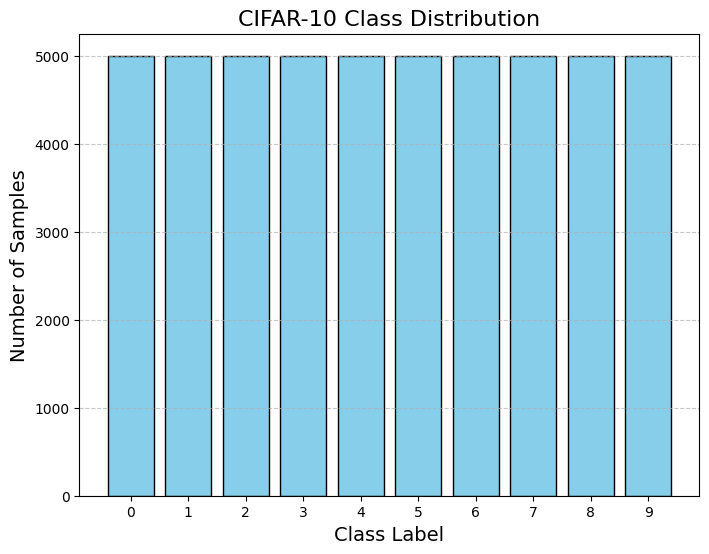

In [56]:
from collections import Counter

# Load the CIFAR-10 dataset using torchvision

# It contains the full dataset downloaded in the point 4.1
full_train_dataset
cifar10_data = full_train_dataset

# Get the targets (labels) from the dataset
labels = cifar10_data.targets

# Count the number of samples for each class
class_counts = Counter(labels)

# Sort the counts by class index for plotting
classes, counts = zip(*sorted(class_counts.items()))

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(classes, counts, color='skyblue', edgecolor='black')
plt.title('CIFAR-10 Class Distribution', fontsize=16)
plt.xlabel('Class Label', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.xticks(classes, labels=list(range(10))) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **5: Improve the accuracy** (BONUS)

### 5.1: Custom model

After successfully debugging the model, you'll notice that the accuracy on the CIFAR-10 dataset is only around 50-60%. Your second task is to improve the model's performance.

How?

*   Add more convolutional layers to capture higher-level features.
*   Use Batch Normalization
*   Add Dropout Layers

Data Augmentation:
*   Apply transformations like random cropping, flipping, and rotation.

Hint: You CAN implement already pre-existing CNN architectures (do your research). As long as it is a CNN everything is fine.

By the end of this section you should return the accuracy of your model on the test dataset.

NB: by better score we mean at least +10% with respect to the previous model.





In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# Define transformations for the data
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


--------------------------------------------

**Fill in the code in `libs/models/custom_cnn.py**

--------------------------------------------

In [59]:
from libs.models import CustomCNN

net = CustomCNN().to(device)

TypeError: super(type, obj): obj must be an instance or subtype of type

#### Training

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=5e-05)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}')

print('Finished Training')


Epoch 1, Loss: 1.5830
Epoch 2, Loss: 1.1779
Epoch 3, Loss: 0.9867
Epoch 4, Loss: 0.8732
Epoch 5, Loss: 0.7743
Epoch 6, Loss: 0.6982
Epoch 7, Loss: 0.6265
Epoch 8, Loss: 0.5607
Epoch 9, Loss: 0.4944
Epoch 10, Loss: 0.4433
Finished Training


#### Evaluation

In [ ]:
# Evaluate the model
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

Accuracy on the test images: 80.10%



### 5.2: Pretrained network
In this exercise, you will start from scratch to adapt a pre-trained AlexNet model for the CIFAR-10 dataset.

Instructions

- Use torchvision.models to load a pre-trained AlexNet. Be sure to specify that the model should be pre-trained on ImageNet.

- The CIFAR-10 dataset has 10 classes, so you need to update the model’s final layer to output 10 classes instead of the default 1000.

- Replace the final fully connected layer in AlexNet’s classifier to output 10 classes.

- To perform fine-tuning, freeze all layers except the newly added fully connected layer.

- Move your model to the appropriate device (cuda if available). Define a device and ensure the model is moved to that device.


In [ ]:
# Define transformations for the data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#####################################################
##              YOUR CODE HERE                     ##
#####################################################

model = models.alexnet(pretrained=True)

num_classes = 10
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

# Freeze all layers except the final fully connected layer
for param in model.parameters():
    param.requires_grad = False

for param in model.classifier[6].parameters():
    param.requires_grad = True


#####################################################
##              END OF YOUR CODE                   ##
#####################################################
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

c:\Users\Edoardo\Documents\GitHub\FDS-HW2\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Edoardo\Documents\GitHub\FDS-HW2\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-05)

# Training loop
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}')

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

Epoch 1, Loss: 0.7222
Finished Training
Accuracy on the test images: 81.08%
